Based on the notebook "Quick Visualization and Eda for Beginners" by Fatih Bilgin

*1. Importing Libraries*

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/learn-together/sample_submission.csv
/kaggle/input/learn-together/test.csv
/kaggle/input/learn-together/train.csv


*2.  Exploratory Data Analysis (EDA)*

In [2]:
df_test = pd.read_csv('../input/learn-together/test.csv')
df_train = pd.read_csv('../input/learn-together/train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
print("Train dataset shape: "+ str(df_train.shape))
print("Test dataset shape:  "+ str(df_test.shape))

Train dataset shape: (15120, 56)
Test dataset shape:  (565892, 55)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

There are a total of 56 columns in the train dataset (55 in test dataset except the last column that is y), All of them are not null.

In [5]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


All Wilderness_Area and Soil_Type columns have values in the range of 0 and 1. Quite likely these columns are categorical and consist of 0 and 1. To validate this let's check distinct values of the following columns:

In [6]:
print(df_train.iloc[:,10:-1].columns)

Index(['Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40'],
      dtype='object')


In [7]:
pd.unique(df_train.iloc[:,10:-1].values.ravel())

array([6279,    1,    0, ..., 5109, 4718, 5466])

In [8]:
df_train.iloc[:,10:-1] = df_train.iloc[:,10:-1].astype("category")
df_test.iloc[:,10:] = df_test.iloc[:,10:].astype("category")

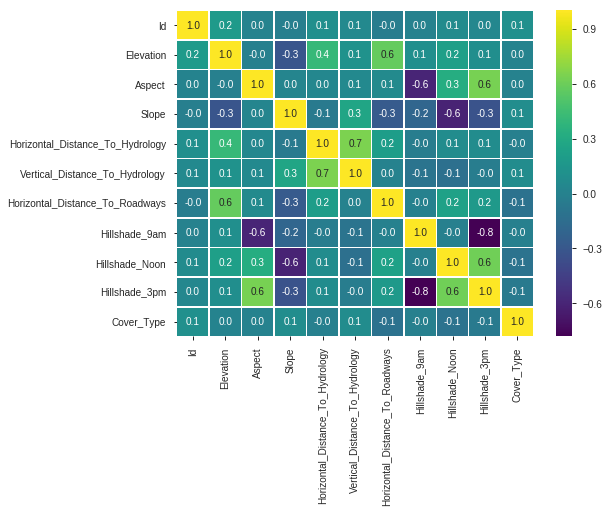

In [9]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True, linewidths=.5, fmt='.1f', cmap="viridis", ax=ax)
plt.show()

It seems the most important correlations are between "Horizontal Distance To Hydrology" and "Vertical Distance To Hydrology" with 70%; between "Aspect" and "Hillshade 3pm" with 60%; between "Hillshade Noon" and "Hillshade 3pm" with %60; between "Elevation" and "Horizontal Distance To Roadways" with %60. Let's see how they look in a scatter plot.



*3.  Data Visualization*

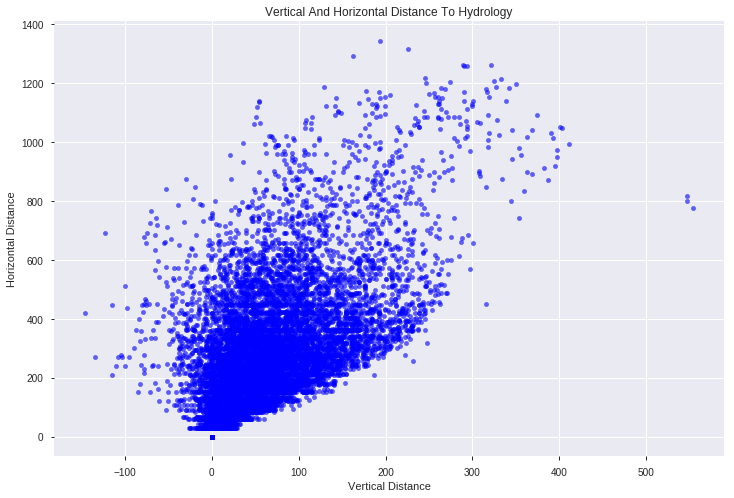

In [10]:
df_train.plot(kind='scatter', x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology', alpha=0.6, color='blue', figsize = (12,8))
plt.title('Vertical And Horizontal Distance To Hydrology')
plt.xlabel("Vertical Distance")
plt.ylabel("Horizontal Distance")
plt.show()

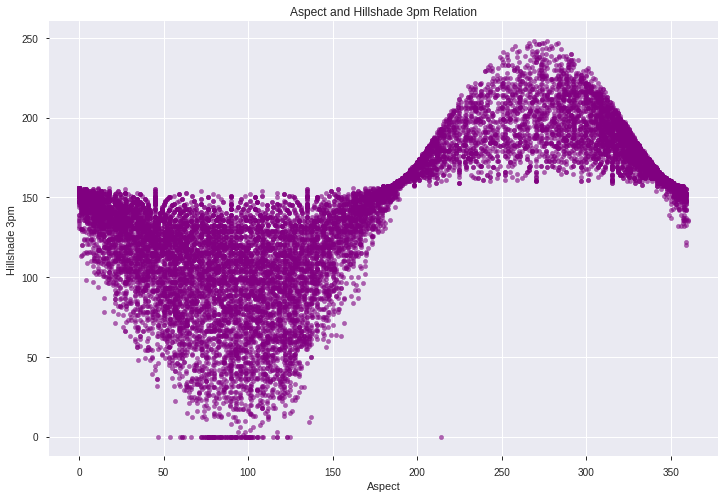

In [11]:
df_train.plot(kind='scatter', x='Aspect', y='Hillshade_3pm', alpha=0.6, color='purple', figsize = (12,8))
plt.title('Aspect and Hillshade 3pm Relation')
plt.xlabel("Aspect")
plt.ylabel("Hillshade 3pm")
plt.show()

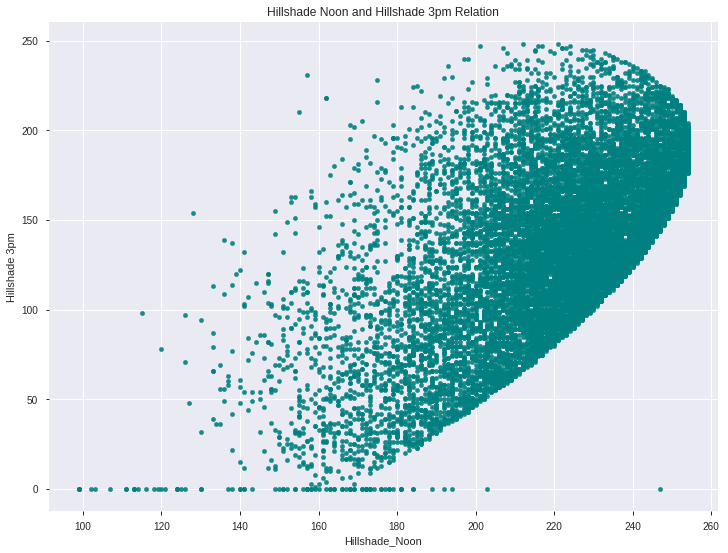

In [12]:
df_train.plot(kind='scatter', x='Hillshade_Noon', y='Hillshade_3pm', alpha=0.9, color='teal', figsize = (12,9))
plt.title('Hillshade Noon and Hillshade 3pm Relation')
plt.xlabel("Hillshade_Noon")
plt.ylabel("Hillshade 3pm")
plt.show()

There are obvious patterns we can use to fit to our model.  We just need to ignore the outliers.  With Boxplots we can best visualize them.

Text(0, 0.5, 'Distance (meters)')

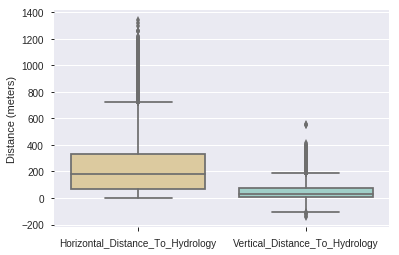

In [13]:
ax = sns.boxplot(data=df_train.iloc[:,4:6], palette="BrBG")
ax.set_ylabel('Distance (meters)')

Text(0, 0.5, 'Aspect in degrees azimuth (0-250)')

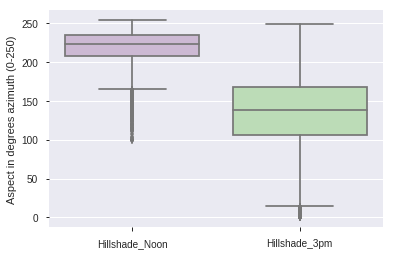

In [14]:
ax = sns.boxplot(data=df_train.iloc[:,8:10], palette="PRGn")
ax.set_ylabel('Aspect in degrees azimuth (0-250)')

Ok great, lets look at some histograms to compare Horizontal Distance to Hydrology and Vertical Distance to Hydrology.

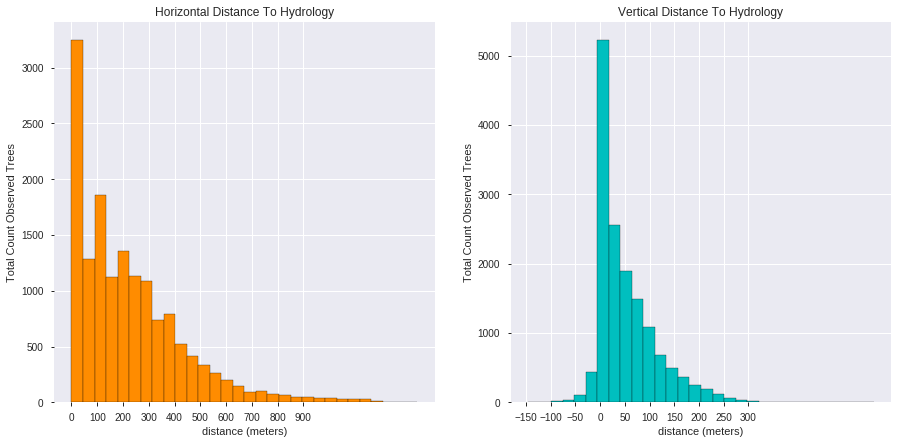

In [15]:
f,ax=plt.subplots(1,2,figsize=(15,7))
df_train.Horizontal_Distance_To_Hydrology.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='darkorange')
ax[0].set_title('Horizontal Distance To Hydrology')
x1=list(range(0,1000,100))
ax[0].set_xticks(x1)
ax[0].set_xlabel('distance (meters)')
ax[0].set_ylabel('Total Count Observed Trees')
df_train.Vertical_Distance_To_Hydrology.plot.hist(ax=ax[1],bins=30,edgecolor='black',color='C')
ax[1].set_title('Vertical Distance To Hydrology')
x2=list(range(-150,350,50))
ax[1].set_xticks(x2)
ax[1].set_xlabel('distance (meters)')
ax[1].set_ylabel('Total Count Observed Trees')
plt.show()

Definitely a trend of observed tree counts and proximity to water. Let's now look at soil types.

Text(0.5, 1.0, 'Count of Soil Types With Value 1')

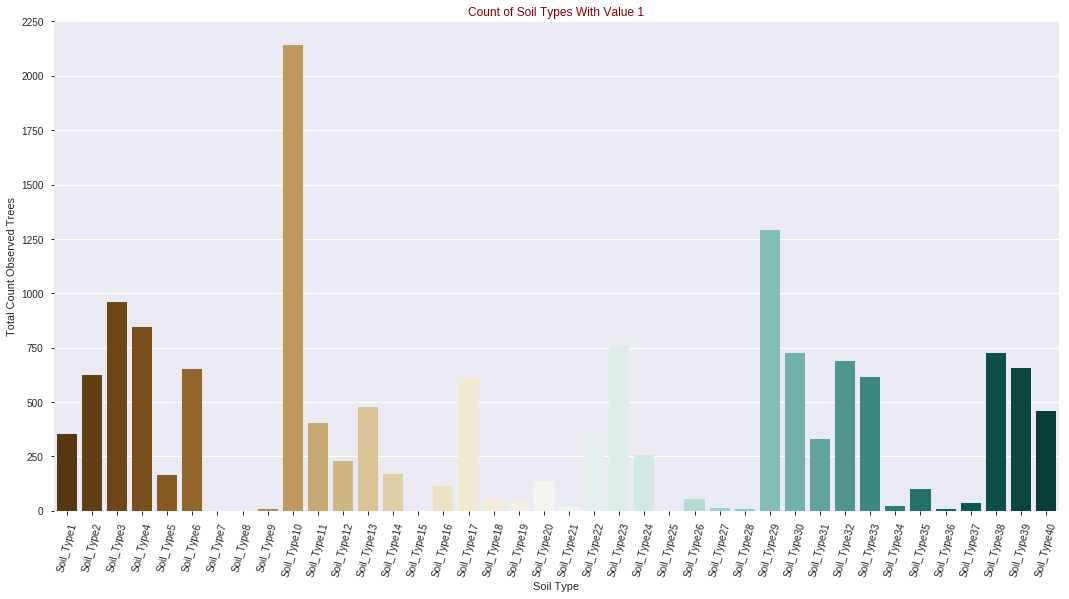

In [16]:
soil_types = df_train.iloc[:,15:-1].sum(axis=0)

plt.figure(figsize=(18,9))
sns.barplot(x=soil_types.index, y=soil_types.values, palette="BrBG")
plt.xticks(rotation= 75)
plt.xlabel('Soil Type')
plt.ylabel('Total Count Observed Trees')
plt.title('Count of Soil Types With Value 1',color = 'darkred',fontsize=12)

Soil Types of "10" and "29" contain the greatest counts of trees, whereas soil types like "7, 8, 15, and 25" have little to no tree data.  Let's have a look at Wilderness Areas.

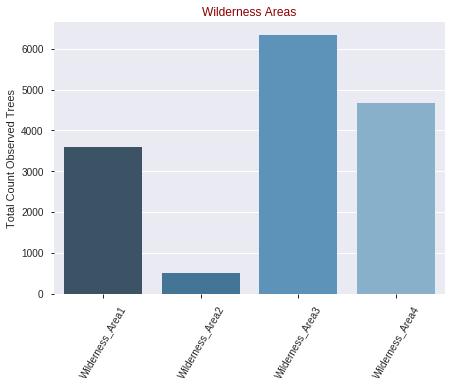

In [17]:
wilderness_areas = df_train.iloc[:,11:15].sum(axis=0)

plt.figure(figsize=(7,5))
sns.barplot(x=wilderness_areas.index,y=wilderness_areas.values, palette="Blues_d")
plt.xticks(rotation=60)
plt.title('Wilderness Areas',color = 'darkred',fontsize=12)
plt.ylabel('Total Count Observed Trees')
plt.show()

There are varying quantities of the 15,120 observed trees in both soil type and wilderness area. Let us see about the quantities in the cover type, which is what we will be predicting in the test set.

In [18]:
cover_type = df_train["Cover_Type"].value_counts()
df_cover_type = pd.DataFrame({'CoverType': cover_type.index, 'Total':cover_type.values})

fig = px.bar(df_cover_type, x='CoverType', y='Total', height=400, width=650)
fig.show()

There are equal counts of all 7 cover types in the training set.  Let us take a look at how the 7 cover types relate to Horizontal distance to Roadways, and Horizontal Distance to Hydrology.

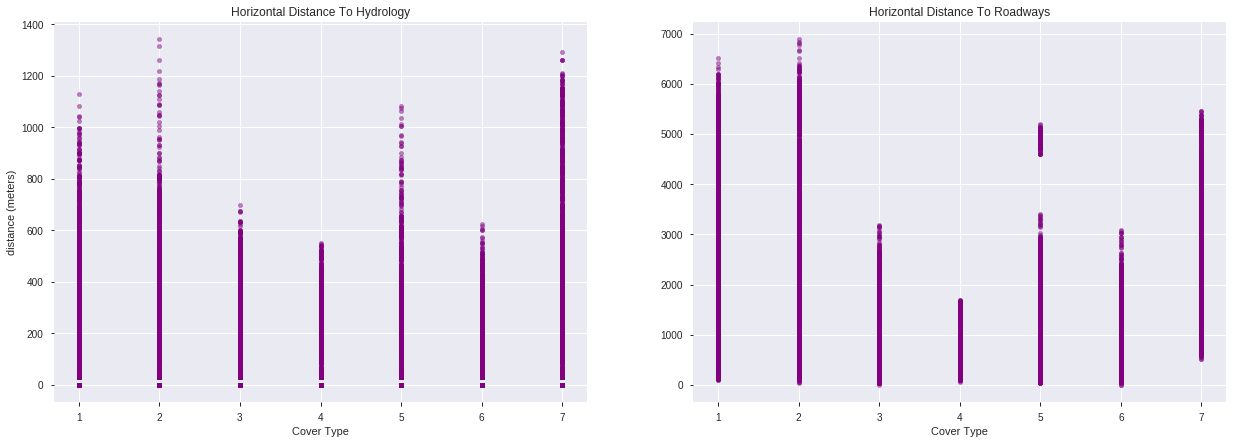

In [19]:
f, ax=plt.subplots(1,2,figsize=(21,7))
df_train.plot(kind='scatter', ax=ax[0],x='Cover_Type', y='Horizontal_Distance_To_Hydrology', alpha=0.5, color='purple')
ax[0].set_title('Horizontal Distance To Hydrology')
x1=list(range(1,8,1))
ax[0].set_ylabel("distance (meters)")
ax[0].set_xlabel("Cover Type")
df_train.plot(kind='scatter', ax=ax[1],x='Cover_Type', y='Horizontal_Distance_To_Roadways', alpha=0.5, color='purple')
ax[1].set_title('Horizontal Distance To Roadways')
x2=list(range(1,8,1))
ax[1].set_ylabel("")
ax[1].set_xlabel("Cover Type")

plt.show()

Similar patterns!

Enjoyed working on this notebook.  Thank you again Fatih Bilgin for your prior work.  It helped me greatly to practice doing Exploratory Data Analysis and make great looking visualizations for this data set.  Looking forward to diving into machine learning to see what we can come up with.